In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Sat Dec 15 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.0-7-amd64
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import data
import mne

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
print(PROJ_ROOT)
print(DATA_ROOT)
print(PROCESSED_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
data = np.transpose(data.values)

/home/kovar/thesis_project
/home/kovar/thesis_project/data
/home/kovar/thesis_project/data/processed
Opening raw data file /home/kovar/thesis_project/data/processed/1a.fif...
This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.


<ipython-input-2-feebbbdfcce0>:29: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))


In [3]:
from pytisean import tiseano, tiseanio

# generate Lorenz
# stdout, msg = tiseano("lorenz", "-l", "2000")

# Multiple output command example (d2)
d2_out, msg = tiseanio("d2", '-N', '0','-c', "1", data=data[0])

# plot output c2
plt.scatter(d2_out["c2"][:,0], d2_out["c2"][:,1],s=0.1)
plt.yscale('log')
plt.ylim([1e-7,1])
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation sum")
plt.show()
# plot output d2
plt.scatter(d2_out["d2"][:,0], d2_out["d2"][:,1],s=0.1)
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation dimension")
plt.show()
# plot output h2
plt.scatter(d2_out["h2"][:,0], d2_out["h2"][:,1],s=0.1)
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("length scale")
plt.ylabel("correlation entropy")
plt.show()

Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.d2 contains:

File outFile.c2 contains:

File outFile.h2 contains:

File outFile.stat contains:



KeyboardInterrupt: 

In [20]:
from pytisean import tiseano, tiseanio

lle_out, msg = tiseanio("lyap_k", '-l', '15000','-d', "4", '-m', '5', '-M', '15', '-t', '0', data=data[0])


TISEAN 3.0.0 (C) R. Hegger, H. Kantz, T. Schreiber (1998-2007)

lyap_k: Estimates the maximal Lyapunov exponent using the Kantz
	algorithm

Using /tmp/pytisean_temp_2018-12-15-17-40-57_azzw7a1x/inFile as datafile, reading column 1
Use 15000 lines.
Opened /tmp/pytisean_temp_2018-12-15-17-40-57_azzw7a1x/outFile for writing
epsilon= 4.209901e-02
epsilon= 7.486380e-02
epsilon= 1.331287e-01
epsilon= 2.367401e-01
epsilon= 4.209901e-01



In [22]:
lle_out[lle_out[:,2] == max(lle_out[:,2])][:,1]

array([-4.828083, -3.141317, -2.724874, -2.773738, -3.137188, -2.61782 ,
       -2.384836, -2.385223, -2.537068, -2.335955, -2.189719, -2.174987,
       -2.239728, -2.187107, -2.084667, -2.066142, -2.097068, -2.061513,
       -1.969978, -1.933758, -1.96002 , -1.972128, -1.927116, -1.911522,
       -1.942185, -1.940855, -1.919121, -1.928235, -1.964683, -1.921438,
       -1.895567, -1.924838, -1.973248, -1.917308, -1.871897, -1.889738,
       -1.935268, -1.913449, -1.872073, -1.888062, -1.923717, -1.884276,
       -1.877675, -1.889074, -1.948381, -1.856309, -1.843598, -1.866909,
       -1.936814, -1.870207, -1.854874])

In [23]:
lle_out

array([[  0.      ,  -5.441722,  12.      ],
       [  1.      ,  -3.534629,  12.      ],
       [  2.      ,  -3.122168,  12.      ],
       [  3.      ,  -3.214397,  12.      ],
       [  4.      ,  -3.602552,  12.      ],
       [  5.      ,  -2.826527,  12.      ],
       [  6.      ,  -2.542178,  12.      ],
       [  7.      ,  -2.5211  ,  12.      ],
       [  8.      ,  -2.819825,  12.      ],
       [  9.      ,  -2.546   ,  12.      ],
       [ 10.      ,  -2.364702,  12.      ],
       [ 11.      ,  -2.289174,  12.      ],
       [ 12.      ,  -2.325669,  12.      ],
       [ 13.      ,  -2.340213,  12.      ],
       [ 14.      ,  -2.208742,  12.      ],
       [ 15.      ,  -2.093507,  12.      ],
       [ 16.      ,  -2.097143,  12.      ],
       [ 17.      ,  -2.189054,  12.      ],
       [ 18.      ,  -2.18135 ,  12.      ],
       [ 19.      ,  -2.050719,  12.      ],
       [ 20.      ,  -2.023792,  12.      ],
       [ 21.      ,  -2.124696,  12.      ],
       [ 2

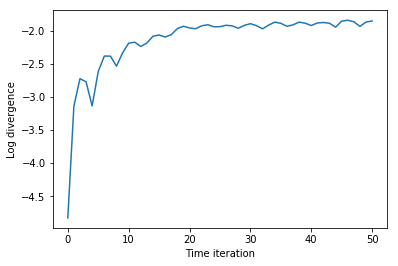

In [27]:
plt.plot(lle_out[lle_out[:,2] == max(lle_out[:,2])][:,1])
# plt.yscale('log')
# plt.ylim([1e-7,1])
plt.xlabel("Time iteration")
plt.ylabel("Log divergence")
plt.show()

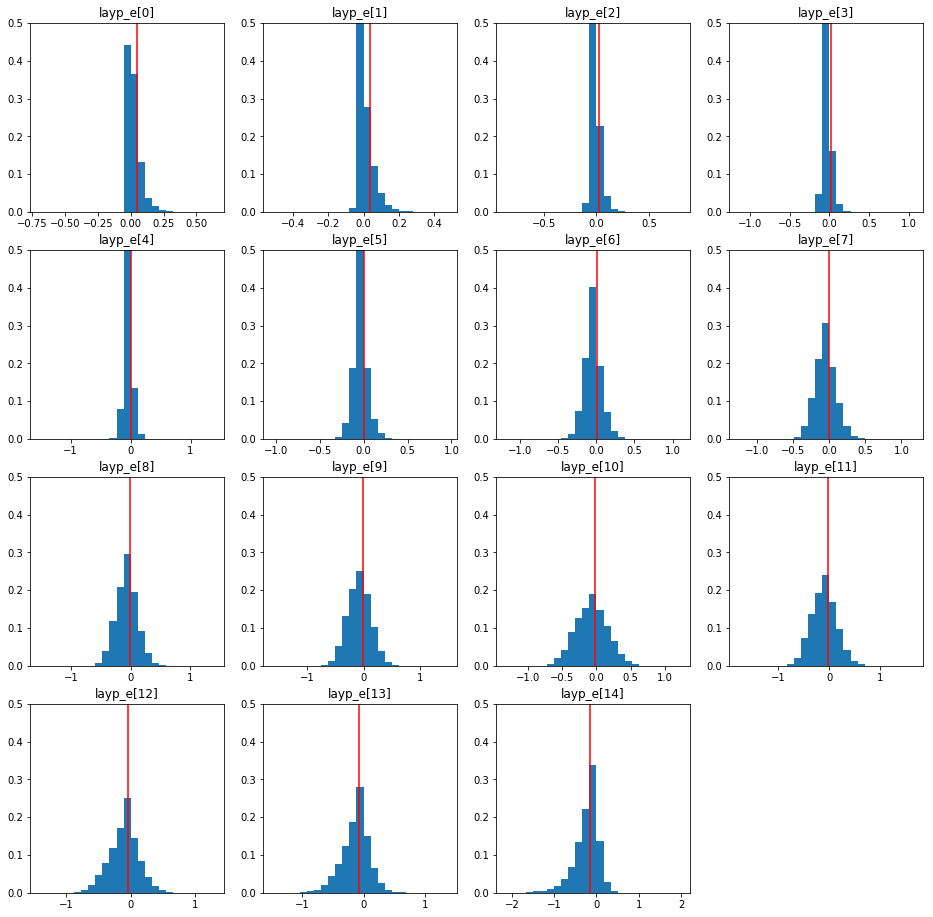

array([ 11.746955  ,   8.461632  ,   5.7738    ,   3.9445784 ,
         2.405506  ,   1.3574523 ,   0.15308036,  -1.0068604 ,
        -2.225425  ,  -3.669051  ,  -5.5188046 ,  -8.28475   ,
       -12.134834  , -18.702349  , -35.71935   ], dtype=float32)

In [32]:
from nolds import lyap_e
lle_res = lyap_e(data[0][:15000], emb_dim=15, matrix_dim=15, min_nb=None, min_tsep=50, tau=4, debug_plot=True)
lle_res / 0.004